<a href="https://colab.research.google.com/github/saspav/DA-104/blob/main/%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B0_%D0%A1%D0%92_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание по стажировке: Статистический анализ данных

### Будем проверять гипотезы: 

### 1. Средняя зарплата по вакансиям "Аналитик данных" не отличается в Москве и Санкт-Петербурге
### 2. Ключевой навык "Python" оказывает влияние на зарплату аналитика

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from time import time
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")

In [3]:
df = pd.DataFrame()

# path_file = r'D:\python-txt\DA-104_full\проект_стажировкa'
path_file = '/content/drive/MyDrive'
name_file = 'result roles (16.06.2022).xlsx'
file_xls = os.path.join(path_file, name_file)
file_pkl = os.path.join(path_file, 'dataset.pkl')
file_pickle = os.path.join(path_file, 'dataset_stats.pkl')
read_msg = lambda s: print(f'Читаю файл: {s}')

start_time = time()
if os.access(file_pkl, os.F_OK):
    read_msg(file_pkl)
    df = pd.read_pickle(file_pkl)
else:
    read_msg(file_xls)
    df = pd.read_excel(file_xls)
print(f'Время выполнения: {time() - start_time} сек\n')

Читаю файл: /content/drive/MyDrive/dataset.pkl
Время выполнения: 3.072711944580078 сек



In [4]:
df.head()

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,employer,snippet,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region
0,False,Младший специалист ручного тестирования,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-28T09:08:00+0300,2022-03-28T09:08:00+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Внимательны и наблюдательны. ...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область
1,False,Пентестер,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-04-01T08:52:06+0300,2022-04-01T08:52:06+0300,False,"{'id': '719820', 'name': 'SearchInform', 'url'...",{'requirement': 'Глубокие знания клиентских и ...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
2,False,Асессор-тестировщик,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29T15:20:02+0300,2022-03-29T15:20:02+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Консультирование коллег по уж...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
3,False,Тестировщик (асессор),False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29T15:37:33+0300,2022-03-29T15:37:33+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Готовы работать не меньше 20 ...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
4,False,Тестировщик.Net,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-04-07T12:35:39+0300,2022-04-07T12:35:39+0300,False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область


#### Используем наработки с этапа EDA
Чтение данных из экселя занимает слишком много времени. В датафрейме содержится много колонок с именами Unnamed% уберем эти колонки и колонки с малым количеством данных и неинформативные колонки со ссылками.

In [5]:
drop_cols = [col for col in df.columns if col.startswith('Unnamed')]
drop_cols.extend(['id', 'department', 'url', 'alternate_url', 'relations', 'insider_interview'])
drop_cols = [col for col in drop_cols if col in df.columns]
df.drop(drop_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   premium                   76382 non-null  bool  
 1   name                      76382 non-null  object
 2   has_test                  76380 non-null  object
 3   response_letter_required  76382 non-null  object
 4   area                      76381 non-null  object
 5   salary                    40874 non-null  object
 6   type                      76379 non-null  object
 7   published_at              76380 non-null  object
 8   created_at                76381 non-null  object
 9   archived                  76380 non-null  object
 10  employer                  76382 non-null  object
 11  snippet                   76381 non-null  object
 12  schedule                  76381 non-null  object
 13  working_days              76381 non-null  object
 14  working_time_intervals

Теперь другое дело. И сохраним датафрейм в формате pickle для ускорение чтения и записи данных

In [6]:
if not os.access(file_pkl, os.F_OK):
    df.to_pickle(file_pkl)

In [7]:
start_time = time()
df = pd.read_pickle(file_pkl)
print(f'Время выполнения: {time() - start_time} сек\n')

Время выполнения: 1.5535624027252197 сек



In [8]:
def is_null(item):
    if pd.isna(item):
        return True
    item = item.strip()
    if not item or item in ('[]',):
        return True
    return False


def marking_nan(item):
    if is_null(item):
        return np.NaN
    return item

# если значение ячейки пустое --> запишем в неё NaN
for name_col in df.columns:
    if pd.api.types.is_string_dtype(df[name_col]):
        df[name_col] = df[name_col].map(marking_nan)      

#### Поработаем с колонкой *name*

In [9]:
# переведем в нижний регистр
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.replace('1c', '1с')
df['name'] = df['name'].str.replace('тестировщик (асессор)', 'асессор-тестировщик')
# выделим ту часть, что в скобках
df['name_parts'] = df['name'].str.split('(')
df['name_part1'] = df['name_parts'].apply(lambda x: x[0].strip())
df['name_part2'] = df['name_parts'].apply(lambda x: x[1].strip(')') if len(x) > 1 else np.NaN)
df.drop('name_parts', axis=1, inplace=True)

In [10]:
# преобразование строки в словарь или список словарей

from ast import literal_eval


STAPLES = {'{': '}', '[': ']'}


def get_item_from_dict(cell_text, key_name='name'):
    value = np.NaN
    if not pd.isna(cell_text):
        cell_text = cell_text.strip()
        ch_fst = cell_text[0]
        ch_lst = cell_text[-1]
        # открывающая и закрывающая скобки должны быть и быть одинаковыми
        if ch_fst in STAPLES.keys() and ch_lst == STAPLES[ch_fst]:
            result = literal_eval(cell_text)
            if isinstance(result, dict):
                value = result.get(key_name, np.NaN)
            elif isinstance(result, list):
                values = []
                for item in result:
                    value = item.get(key_name, np.NaN)
                    if not pd.isna(value):
                        values.append(value)
                if values:
                    return sorted(values)
    return value


def make_str_lower(item):
    if isinstance(item, list):
        return tuple([s.lower() for s in item])
    return item

In [11]:
# salary поделить на 2 части мин и мах оклад,
# учесть при gross = True это без вычета налогов,
# т.е если False --> поделим на 0.87

def get_salary(cell_text):
    value_from = get_item_from_dict(cell_text, 'from')
    value_to = get_item_from_dict(cell_text, 'to')
#     if pd.isna(value_from) or not value_from:
#         value_from = value_to
#     if pd.isna(value_to) or not value_to:
#         value_to = value_from
    gross = get_item_from_dict(cell_text, 'gross')
    # если это чистый доход, т.е. с учетом налогов --> умножим на 13%
    if not gross:
        if value_from:
            value_from = round(value_from / 0.87)
        if value_to:
            value_to = round(value_to / 0.87)
    return value_from, value_to


df['salary_min'] = df['salary'].map(get_salary)
df['salary_max'] = df['salary_min'].apply(lambda x: x[1])
df['salary_min'] = df['salary_min'].apply(lambda x: x[0])

In [12]:
# published_at, created_at преобразовать в datetime # 2022-03-29T15:37:33+0300
# заполним пропуски в published_at данными из created_at
df.published_at = df.apply(lambda row: row.created_at if pd.isna(row.published_at) else row.published_at, axis=1)
for col in ('published_at', 'created_at'):
    df.dropna(subset=[col], inplace=True)
    # выделим строку с датой
    df[col] = df[col].str.findall( r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}')
    df[col] = df[col].apply(lambda s: s[0] if s else np.NaN)
    df.dropna(subset=[col], inplace=True)
    # преобразуем в формат datetime
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%S')

### Преобразуем значения в остальных колонках из словарей в читаемые поля

In [13]:
# Преобразуем значения в остальных колонках из словарей в читаемые поля
# convert_columns = ('area', 'type', 'employer', 'schedule', 'experience', 'key_skills', 'specializations')
convert_columns = ('area', 'employer', 'experience', 'key_skills', 'specializations')
for name_col in convert_columns:
    print(f'Обрабатываю колонку {name_col}')
    for key_dict in ('id', 'name'):
        new_name = f'{name_col}_{key_dict}'
        df[new_name] = df[name_col].apply(lambda x: get_item_from_dict(x, key_dict))
        if name_col in ('key_skills', 'specializations'):
            df[new_name] = df[new_name].map(make_str_lower)

Обрабатываю колонку area
Обрабатываю колонку employer
Обрабатываю колонку experience
Обрабатываю колонку key_skills
Обрабатываю колонку specializations


In [14]:
df.head()

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,employer,snippet,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,name_part1,name_part2,salary_min,salary_max,area_id,area_name,employer_id,employer_name,experience_id,experience_name,key_skills_id,key_skills_name,specializations_id,specializations_name
0,False,младший специалист ручного тестирования,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-28 09:08:00,2022-03-28 09:08:00,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Внимательны и наблюдательны. ...,"{'id': 'remote', 'name': 'Удаленная работа'}",NaN,NaN,NaN,False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",NaN,"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,младший специалист ручного тестирования,NaN,NaN,NaN,15,Астрахань,1740,Яндекс,noExperience,Нет опыта,NaN,NaN,"(1.117, 1.172, 15.93)","(информационные технологии, интернет, мультиме..."
1,False,пентестер,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-04-01 08:52:06,2022-04-01 08:52:06,False,"{'id': '719820', 'name': 'SearchInform', 'url'...",{'requirement': 'Глубокие знания клиентских и ...,"{'id': 'fullDay', 'name': 'Полный день'}",NaN,NaN,NaN,False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,пентестер,NaN,NaN,NaN,15,Астрахань,719820,SearchInform,between3And6,От 3 до 6 лет,NaN,"(linux, sql, базы данных, информационная безоп...","(1.117, 1.221, 1.82)","(инженер, программирование, разработка, тестир..."
2,False,асессор-тестировщик,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29 15:20:02,2022-03-29 15:20:02,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Консультирование коллег по уж...,"{'id': 'remote', 'name': 'Удаленная работа'}",NaN,NaN,NaN,False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,асессор-тестировщик,NaN,NaN,NaN,15,Астрахань,1740,Яндекс,noExperience,Нет опыта,NaN,NaN,"(1.117, 1.221, 1.82)","(инженер, программирование, разработка, тестир..."
3,False,тестировщик (асессор),False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29 15:37:33,2022-03-29 15:37:33,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Готовы работать не меньше 20 ...,"{'id': 'remote', 'name': 'Удаленная работа'}",NaN,NaN,NaN,False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,тестировщик,асессор,NaN,NaN,15,Астрахань,1740,Яндекс,noExperience,Нет опыта,NaN,NaN,"(1.117, 1.221, 1.82)","(инженер, программирование, разработка, тестир..."
4,False,тестировщик.net,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-04-07 12:35:39,2022-04-07 12:35:39,False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'id': 'fullDay', 'name': 'Полный день'}",NaN,NaN,NaN,False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,тестировщик.net,NaN,25000.0,50000.0,15,Астрахань,1245158,МФК Саммит,between1And3,От 1 года 

In [15]:
# Признаки: premium, has_test, response_letter_required, type, archived
# почти целиком заполнены одним значением и не представляют дальнейшего
# интереса для анализа, уберем их
used_columns = ['name', 'name_part1', 'name_part2', 'salary_min', 'salary_max', 'region']
used_columns.extend([col for col in df.columns if col.endswith(('_id', '_name'))])

df[used_columns].to_pickle(file_pickle)

In [16]:
start_time = time()
dfp = pd.read_pickle(file_pickle)
print(f'Время выполнения: {time() - start_time} сек\n')

Время выполнения: 0.5567905902862549 сек



In [17]:
# заполним пропуски как 'Нет опыта'
dfp.loc[dfp.experience_name.isna(), 'experience_name'] = 'Нет опыта'
dfp.loc[dfp.experience_id.isna(), 'experience_id'] = 'noExperience'
dfp.loc[dfp.experience_id == '0', 'experience_id'] = 'noExperience'
dfp.loc[dfp.experience_id == 0, 'experience_id'] = 'noExperience'
dfp.experience_id = dfp.experience_id.astype(str)

In [18]:
# В зарплатах есть выбросы, удалим всё, что выходит за пределы трех сигм
salaries = {'salary_min': 'Мин.', 'salary_max': 'Макс.'}
for salary in salaries:
    min_salary = dfp[salary].quantile(0.005)
    max_salary = dfp[salary].quantile(0.995)
    print(f'Признак: {salary}, нижний порог={int(min_salary)}, '
          f'верхний порог={int(max_salary)}')
    outlers_salary = (dfp[salary] < min_salary) | (dfp[salary] > max_salary)
    dfp.loc[outlers_salary, salary] = np.NaN

Признак: salary_min, нижний порог=1724, верхний порог=450000
Признак: salary_max, нижний порог=2874, верхний порог=1149425


In [19]:
# заполним часть пропусков в зарплатах: посчитаем медианный коэфф. между мах и мин salary
dfp['salary_koeff'] = dfp['salary_max'] / dfp['salary_min']
salary_koeff = dfp['salary_koeff'].median()
salary_koeff

1.4999855001014992

In [20]:
# если отсутствует salary_max заполним как salary_min * salary_koeff
dfp['salary_max'] = dfp.apply(
    lambda row: round(row['salary_min'] * salary_koeff) if pd.isna(
        row['salary_max']) and not pd.isna(row['salary_min']) else row['salary_max'], axis=1)
# если отсутствует salary_min заполним как salary_max / salary_koeff
dfp['salary_min'] = dfp.apply(
    lambda row: round(row['salary_max'] / salary_koeff) if pd.isna(
        row['salary_min']) and not pd.isna(row['salary_max']) else row['salary_min'], axis=1)
# посчитаем среднюю зарплату 
dfp['salary_avg'] = dfp[['salary_min', 'salary_max']].mean(axis=1)

In [21]:
# заполним пропуски в идентификаторах нулями
for col_id in ('area_id', 'employer_id', 'specializations_id'):
    dfp.loc[dfp[col_id].isna()] = 0

In [22]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76380 entries, 0 to 76381
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  76380 non-null  object 
 1   name_part1            76380 non-null  object 
 2   name_part2            18206 non-null  object 
 3   salary_min            40791 non-null  float64
 4   salary_max            40791 non-null  float64
 5   region                76374 non-null  object 
 6   area_id               76380 non-null  object 
 7   area_name             76380 non-null  object 
 8   employer_id           76380 non-null  object 
 9   employer_name         76380 non-null  object 
 10  experience_id         76380 non-null  object 
 11  experience_name       76380 non-null  object 
 12  key_skills_id         411 non-null    object 
 13  key_skills_name       63635 non-null  object 
 14  specializations_id    76380 non-null  object 
 15  specializations_nam

### 1 Структурированные данные и их типы для проверки гипотезы 

In [23]:
# отбор по регионам и специальности
areas = ['Москва', 'Санкт-Петербург']
pattern = re.compile('анали.+данн|дат.+анали|data engineer|data scientist')
dfp['used'] = dfp['name'].apply(lambda x: len(re.findall(pattern, str(x))) > 0)
dfs = dfp[dfp['used'] & dfp['area_name'].isin(areas)]
dfs.drop(['name_part1', 'name_part2', 'region', 'salary_koeff', 'used'], axis=1, inplace=True)
dfs

,name,salary_min,salary_max,area_id,area_name,employer_id,employer_name,experience_id,experience_name,key_skills_id,key_skills_name,specializations_id,specializations_name,salary_avg
14222,teamlead группы анализа данных в рекомендатель...,NaN,NaN,1,Москва,8620,Rambler&Co,between3And6,От 3 до 6 лет,NaN,"(big data, hadoop, postgresql, python, sql)","(1.327, 12.92)","(информационные технологии, управление проектами)",NaN
14226,senior data scientist стрим «модели партнерств...,NaN,NaN,1,Москва,4181,Банк ВТБ (ПАО),between3And6,От 3 до 6 лет,NaN,"(nlp, pandas, python, sql, английский язык)","(1.327, 12.92)","(информационные технологии, управление проектами)",NaN
14698,техлид направления анализа данных (ms sql),NaN,NaN,1,Москва,680293,GlobalCareer,moreThan6,Более 6 лет,NaN,"(ms sql, sql)","(1.327, 12.92)","(информационные технологии, управление проектами)",NaN
14804,lead data scientist,NaN,NaN,1,Москва,3529,Сбербанк,between1And3,От 1 года до 3 лет,NaN,"(hadoop, hive, machine learning, sql, spark)","(1.327, 12.92)","(информационные технологии, управление проектами)",NaN
14835,data engineer,NaN,NaN,1,Москва,2180,Ozon,between3And6,От 3 до 6 лет,NaN,"(git, hadoop, postgresql, python, sql, торгова...","(1.327, 12.92)","(информационные технологии, управление проектами)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55205,data engineer (инженер по данным),NaN,NaN,2,Санкт-Петербург,950613,KUPIBILET.RU,between1And3,От 1 года до 3 лет,NaN,"(java, python, scala, sql, английский язык)","(1.10, 1.221, 1.50, 1.82, 1.9)","(web инженер, web мастер, инженер, программиро...",NaN
55297,data engineer (дата инженер),NaN,NaN,2,Санкт-Петербург,3783,Банк Санкт-Петербург,between1And3,От 1 года до 3 лет,NaN,"(etl, java, python, scala, sql)","(1.82, 5.106)","(инженер, коммерческий банк)",NaN
55337,business data engineer,NaN,NaN,2,Санкт-Петербург,78638,Тинькофф,between3And6,От 3 до 6 лет,NaN,"(dwh, databases, etl, hadoop, sql, базы данных...","(1.10, 1.221, 1.50, 1.82, 1.9)","(web инженер, web мастер, инженер, программиро...",NaN
55396,senior data engineer,NaN,NaN,2,Санкт-Петербург,2343,Спортмастер,between3And6,От 3 до 6 лет,NaN,"(data engineer, hadoop, oracle, python, sql)","(1.10, 1.221, 1.50, 1.82, 1.9)","(web инженер, web мастер, инженер, программиро...",NaN


### 2. В датесете присутствуют поля:
- Название вакансии (категориальные)
- минимальная зарплата (количественные)
- максимальная зарплата (количественные)
- средняя зарплата = (min+max)/2 (количественные)
- наименование работодателя (категориальные)
- регион вакансии (категориальные)
- опыт работы (порядковые)
- список ключевых навыков (категориальные)
- список специализация (категориальные)

### 3. Визуализация имеющихся данных в соответствии с их типом.

#### Посмотрим на распределение зарплат

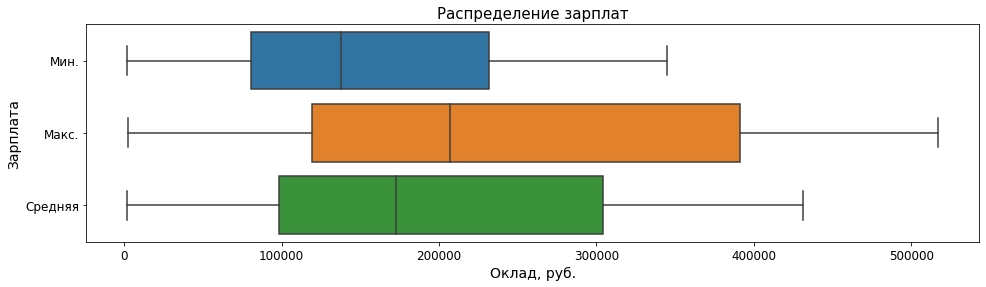

In [24]:
dfsalary = pd.DataFrame(columns=['Оклад, руб.', 'Зарплата'])
salaries = {'salary_min': 'Мин.', 'salary_max': 'Макс.', 'salary_avg': 'Средняя'}
for salary in salaries:
    tmp = dfs[[salary, 'name']]
    tmp.columns = dfsalary.columns
    tmp.loc[:, 'Зарплата'] = salaries[salary]
    dfsalary = pd.concat([dfsalary, tmp], axis=0, ignore_index=True)

fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(x='Оклад, руб.', y='Зарплата', data=dfsalary, ax=ax)
plt.title('Распределение зарплат')
plt.show()    

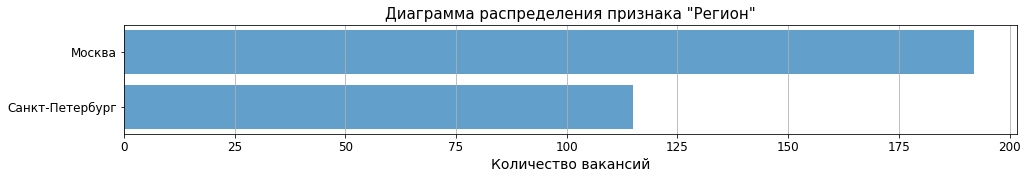

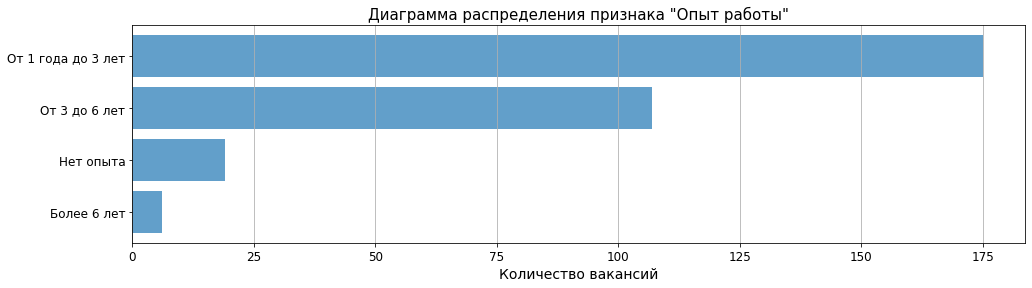

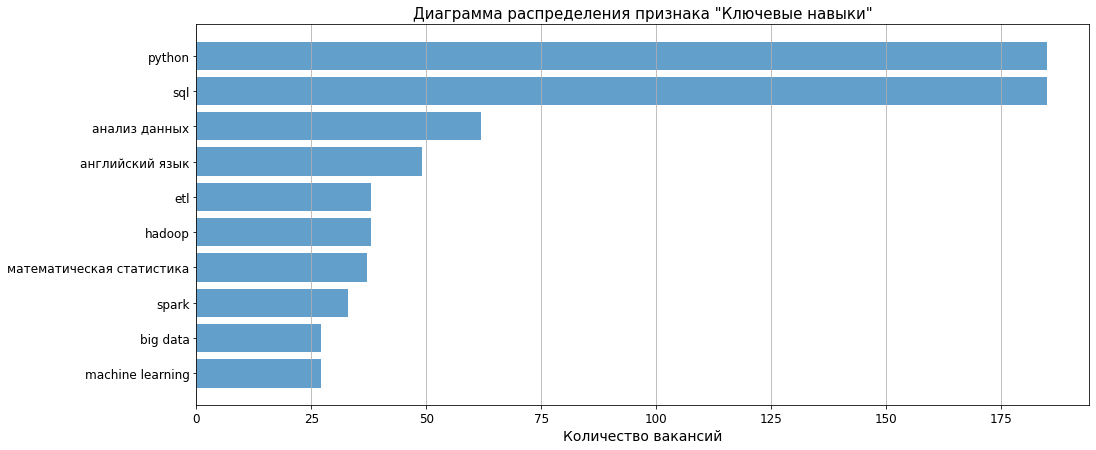

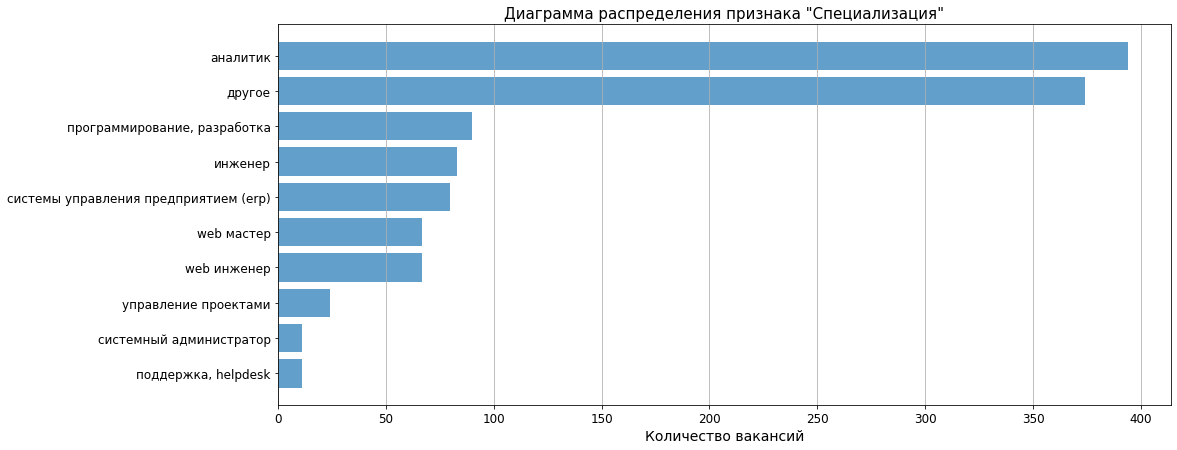

In [25]:
def values_to_df(data, col_name, suffix='name'):
    return pd.DataFrame(pd.core.common.flatten(data[f'{col_name}_{suffix}'].dropna().tolist()), columns=[col_name])

# создадим ДФ из ключевых навыков
df_sk = values_to_df(dfs, 'key_skills')

# создадим ДФ из специализаций
df_sp = values_to_df(dfs, 'specializations')

def show_barh(dataset, column_name, hight):
    features = {'area_name': 'Регион', 'experience_name': 'Опыт работы', 
                'key_skills': 'Ключевые навыки', 'specializations': 'Специализация'}
    show_counts = dataset[column_name].value_counts()[:10][::-1]
    fig, ax = plt.subplots(figsize=(16, hight))
    plt.barh(show_counts.index, show_counts.values, alpha=0.7)
    plt.grid(axis='x')
    plt.title(f'Диаграмма распределения признака "{features.get(name_col)}"')
    plt.xlabel('Количество вакансий')
    plt.show()


graph_columns = {'area_name': 2, 'experience_name': 4, 'key_skills': 7, 'specializations': 7}
for name_col, hight in graph_columns.items():
    if name_col == 'key_skills':
        show_barh(df_sk, name_col, hight)
    elif name_col == 'specializations':
        show_barh(df_sp, name_col, hight)
    else:
        show_barh(dfs, name_col, hight)

#### Выводы по визуализации данных: 
1. У максимальной зарплаты больше межквартильный размах - значит зарплаты более вариабельны.

2. Наиболее нуждаются в работниках Москва.

3. Большинство работодателей ищут кандидатов с опытом работы От 1 года до 3 лет.

4. Самые желаемые навыки кандидата на аналитика данных - это Python и SQL                   

5. Специализация кандидата:
- аналитик                                 
- загадочное "другое"
- программирование и разработка

### 4. Для количественных показателей проверьте гипотезы о виде распределения.

#### Посмотрим на распределение средней зарплаты, т.к. именно для этого параметра будем проверять гипотезу.

In [26]:
# Описательная статистика
dfs.describe()

,salary_min,salary_max,salary_avg
count,60.000000,60.000000,60.000000
mean,165259.150000,244167.633333,204713.391667
std,105125.451394,156373.875908,129457.658844
min,1724.000000,2586.000000,2155.000000
25%,80460.000000,119252.500000,98675.250000
50%,137932.000000,206895.000000,172413.000000
75%,231801.250000,391520.750000,304023.000000
max,344828.000000,517237.000000,431032.500000


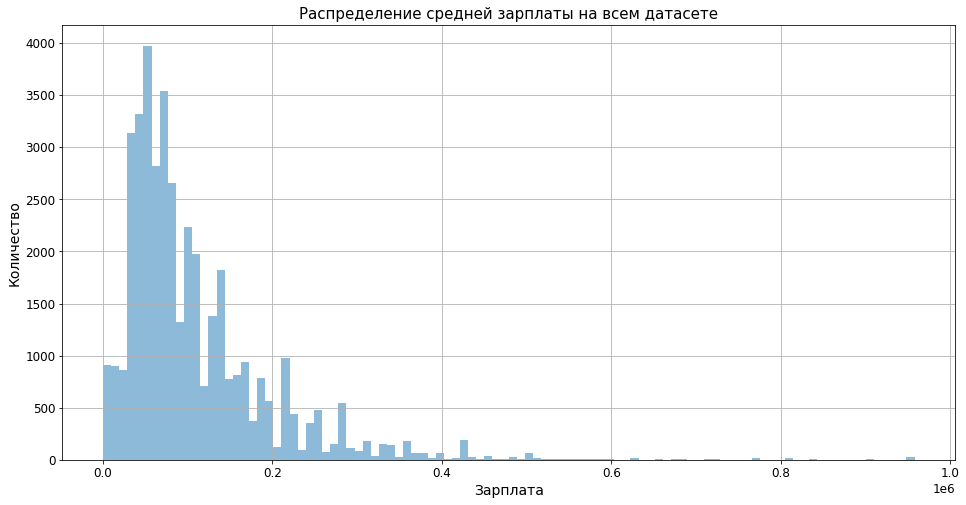

In [27]:
dfp['salary_avg'].hist(bins=100, figsize = (16, 8), alpha=0.5)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title(f'Распределение средней зарплаты на всем датасете')
plt.show()

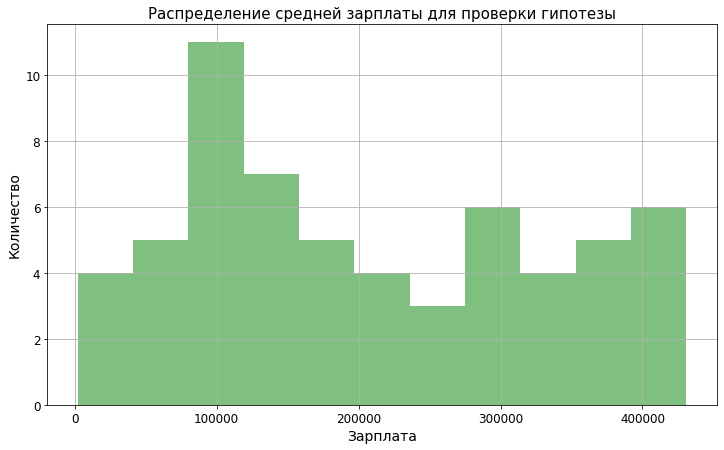

In [28]:
dfs['salary_avg'].hist(bins=11, figsize = (12, 7), color='g', alpha=0.5)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title(f'Распределение средней зарплаты для проверки гипотезы')
plt.show()

По гистограмме видно, что форма распределения далека от нормальной. "Колокол" сдвинут влево, имеется несколько мод.

### Проверка нормальности распределения по критерию Шапиро-Уилка
#### Нулевая гипотеза: распределение зарплат подчиняется нормальному закону распределения

In [29]:
def check_result(p_value, feature=None):
    # задаем уровень значимости 5%
    alpha = 0.05
    if feature is not None:
        nf = f'Признак "{feature}": ' 
    else:
        nf = ''
    print(f'{nf}p-value = {p_value:.4f}')
    # сравниваем p-значение с заданным уровнем статистической значимости
    if results.pvalue < alpha:
        print(f'Отвергаем нулевую гипотезу')
    else:
        print(f'Принимаем нулевую гипотезу')
    print()


for salary in salaries:
    results = stats.shapiro(dfs[salary].dropna())
    check_result(results.pvalue, salary)

Признак "salary_min": p-value = 0.0015
Отвергаем нулевую гипотезу

Признак "salary_max": p-value = 0.0017
Отвергаем нулевую гипотезу

Признак "salary_avg": p-value = 0.0025
Отвергаем нулевую гипотезу



### 5. В зависимости от типов данных, оцените связь между показателями. 
#### Используйте:
- Критерии сравнения групп для анализа связи количественных или порядковых показателей с категориальными. 
- Анализ таблиц сопряженности для оценки связи двух категориальных признаков. 
- Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных.

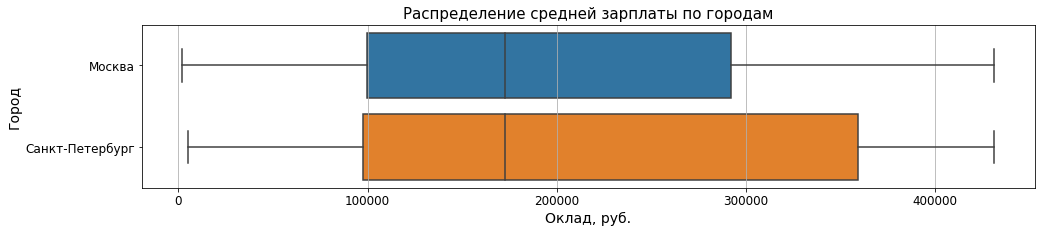

In [30]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.boxplot(x='salary_avg', y='area_name', data=dfs, ax=ax)
plt.title('Распределение средней зарплаты по городам')
plt.grid(axis='x')
plt.ylabel('Город')
plt.xlabel('Оклад, руб.')
plt.show()

#### Выводы по визуализации данных: 
В Санкт-Петербурге у средней зарплаты больше межквартильный размах - значит зарплаты более вариабельны, медианая зарплата примерно одинаковая. Проверим влият ли город на среднюю зарплату с помощью критериея Манна — Уитни:

In [31]:
# задаем уровень значимости 5%
alpha = 0.05
results = stats.mannwhitneyu(*[dfs[dfs['area_name'] == area]['salary_avg'].dropna() for area in areas])
check_result(results.pvalue)

p-value = 0.7132
Принимаем нулевую гипотезу



#### Полученный уровень значимости показал, что в двух столицах на уровне значимости 5% в среднем одинаковые зарплаты для вакансий Дата-аналитика.

Проверим равенство средних зарплат для групп с разным опытом работы с помошью критерия Крускала-Уоллиса (у нас больше 2-х групп, данные ненормальные)

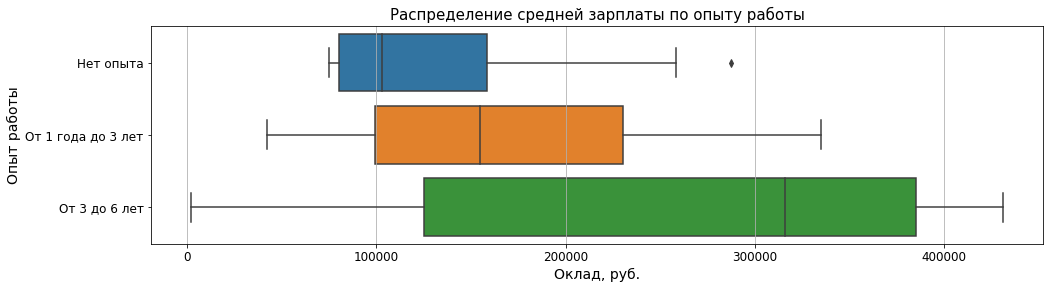

In [32]:
experiences = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет']
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(x='salary_avg', y='experience_name',
            data=dfs[dfs.experience_name.isin(experiences)].dropna(
                subset=['salary_avg']), ax=ax)
plt.title('Распределение средней зарплаты по опыту работы')
plt.grid(axis='x')
plt.ylabel('Опыт работы')
plt.xlabel('Оклад, руб.')
plt.show()

In [33]:
alpha = 0.05
results = stats.kruskal(*[dfs[dfs['experience_name'] == experience]['salary_avg'].dropna() 
                          for experience in experiences])
check_result(results.pvalue)

p-value = 0.0059
Отвергаем нулевую гипотезу



#### Полученный уровень значимости показал, что опыт работы влияет на уровень зарплаты для вакансий Дата-аналитика. Данный вывод хорошо иллюстрирует диаграмма "boxplot". Медианы далеко отстоят друг от друга.

Посмотрим на таблицу сопряженности для оценки связи двух категориальных признаков "Опыт работы" и "Регион".

In [34]:
pd.crosstab(dfs['experience_name'],dfs['area_name'], margins=True, margins_name="Итого")

area_name,Москва,Санкт-Петербург,Итого
experience_name,,,
Более 6 лет,2,4,6
Нет опыта,15,4,19
От 1 года до 3 лет,120,55,175
От 3 до 6 лет,55,52,107
Итого,192,115,307


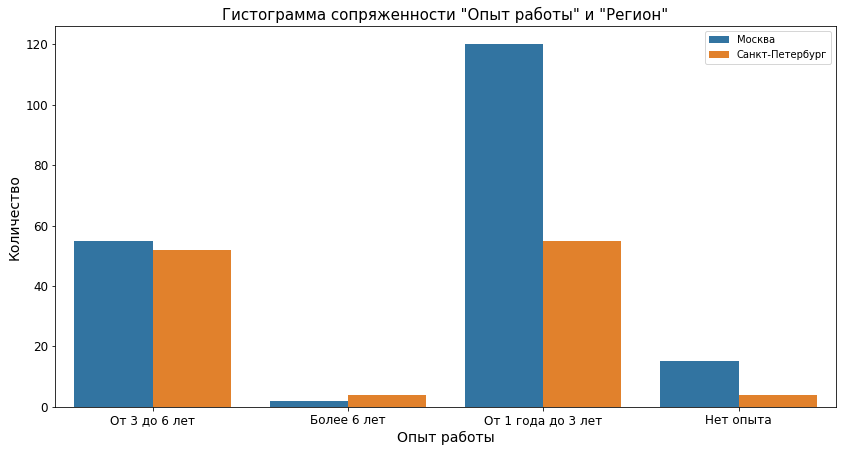

In [35]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x=dfs['experience_name'], hue=dfs['area_name'])
plt.title('Гистограмма сопряженности "Опыт работы" и "Регион"')
plt.ylabel('Количество')
plt.xlabel('Опыт работы')
plt.legend()
plt.show()

In [36]:
ts = pd.crosstab(dfs['experience_name'],dfs['area_name'])
chi2, p_value, dof, _ = stats.chi2_contingency(ts)
print(f"Статистика Хи2: {chi2}\nСтепней свободы: {dof}")
check_result(p_value)

Статистика Хи2: 12.75152413150579
Степней свободы: 3
p-value = 0.0052
Отвергаем нулевую гипотезу



Полученный уровень значимости показал, что признаки "Регион" и "Опыт работы" имеют статистически значимую взаимосвязь.

###### Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных.

Для корреляционного анализа Пирсона в данных только 2 количественные колонки salary_min и salary_max, которые отражают одну сущность - зарплату. Можно попробовать построить корреляционную матрицу. Также преобразуем порядковую переменную "Опыт работы" в "количественную" - отобразим её цифрами. Для исследования отберем вакансии "Аналитик".

In [37]:
dict_experience = {'Нет опыта': 0, 'От 1 года до 3 лет': 1, 'От 3 до 6 лет': 3, 'Более 6 лет': 6}
dfs['experience'] = dfs['experience_name'].map(dict_experience)

# отбор специальности "Аналитик"
patt = re.compile('анали|data engineer|data scientist')
dfp['used'] = dfp['name'].apply(lambda x: len(re.findall(patt, str(x))) > 0)                                
dfa = dfp[dfp['used']].drop(['used'], axis=1)
dfa['experience'] = dfa['experience_name'].map(dict_experience)
dfa.head()

,name,name_part1,name_part2,salary_min,salary_max,region,area_id,area_name,employer_id,employer_name,experience_id,experience_name,key_skills_id,key_skills_name,specializations_id,specializations_name,salary_koeff,salary_avg,experience
7,руководитель it-проектов/аналитик,руководитель it-проектов/аналитик,NaN,NaN,NaN,Астраханская область,15,Астрахань,2076223,Адептик Плюс,between1And3,От 1 года до 3 лет,NaN,NaN,"(1.327, 12.326, 12.92)","(информационные технологии, управление проекта...",NaN,NaN,1
28,"аналитик сопровождения 1с (бгу, зкгу, зкбу)",аналитик сопровождения 1с,"бгу, зкгу, зкбу",NaN,NaN,Астраханская область,15,Астрахань,131539,ФТО,between1And3,От 1 года до 3 лет,NaN,"(1с:бгу, 1с:зкбу, 1с:зкгу, бухгалтерский учет,...","(1.25, 12.746, 17.751, 3.26)","(аналитик, аналитик, другое, другое)",NaN,NaN,1
29,бизнес-аналитик,бизнес-аналитик,NaN,NaN,NaN,Астраханская область,15,Астрахань,2076223,Адептик Плюс,between1And3,От 1 года до 3 лет,NaN,NaN,"(12.197, 12.251, 12.280, 12.331)","(организационное консультирование, реинжинирин...",NaN,NaN,1
31,бизнес-аналитик,бизнес-аналитик,NaN,NaN,NaN,Астраханская область,15,Астрахань,115,Ай-Теко (I-Teco),between1And3,От 1 года до 3 лет,NaN,"(bpmn, idef, uml, бизнес-анализ, разработка те...","(1.25, 12.746, 17.751, 3.26)","(аналитик, аналитик, другое, другое)",NaN,NaN,1
127,аналитик 1с: ух/erp/бит.финанс,аналитик 1с: ух/erp/бит.финанс,NaN,150000.0,200000.0,Астраханская область,15,Астрахань,1512281,«Аксиома-Софт»,between1And3,От 1 года до 3 лет,NaN,NaN,"(1.10, 1.221, 1.50, 1.82, 1.9)","(web инженер, web мастер, инженер, программиро...",1.333333,175000.0,1


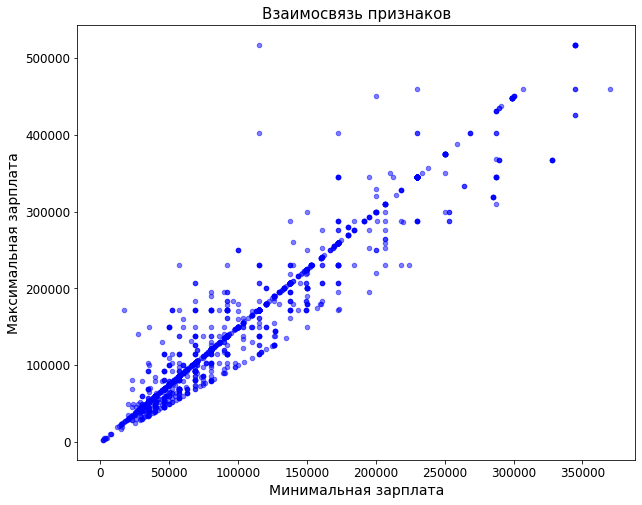

In [38]:
dfa.plot('salary_min','salary_max',kind="scatter", figsize = (10, 8), color='b', alpha=0.5)
plt.title('Взаимосвязь признаков')
plt.xlabel('Минимальная зарплата')
plt.ylabel('Максимальная зарплата')
plt.show()

Между этими признаками видна сильная положительная взаимосвязь.

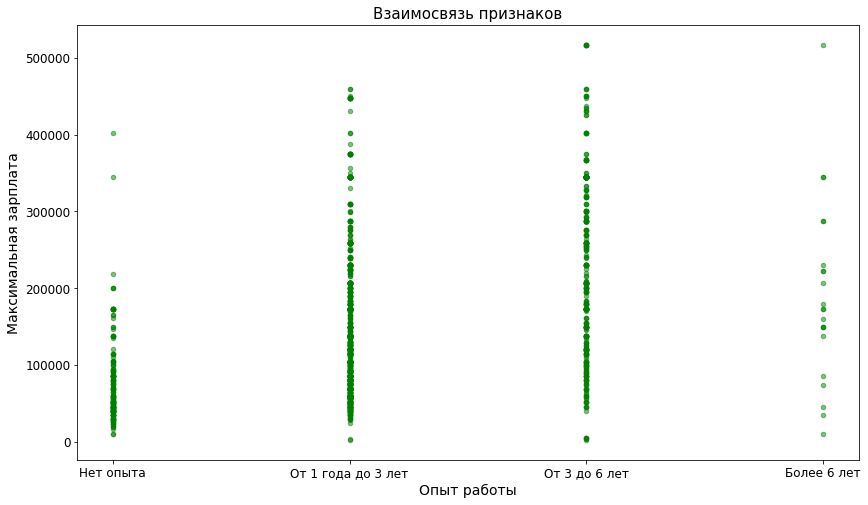

In [39]:
dfa.sort_values('experience').plot('experience_name','salary_max',kind="scatter", figsize = (14, 8), color='g', alpha=0.5)
plt.title('Взаимосвязь признаков')
plt.xlabel('Опыт работы')
plt.ylabel('Максимальная зарплата')
plt.show()

Между этими признаками есть положительная взаимосвязь, насколько сильная, посмотрим на цифрах.
Используем корреляционный анализ Спирмена для порядковых переменных.

In [40]:
# матрица корреляции
corr_names = ['salary_min','salary_max', 'experience']
temp =  dfa[corr_names]
temp.columns = ['Мин.зарплата','Макс. зарплата', 'Опыт работы']
corr_matrix = temp.corr(method='spearman')
corr_matrix

,Мин.зарплата,Макс. зарплата,Опыт работы
Мин.зарплата,1.000000,0.962905,0.473790
Макс. зарплата,0.962905,1.000000,0.449991
Опыт работы,0.473790,0.449991,1.000000


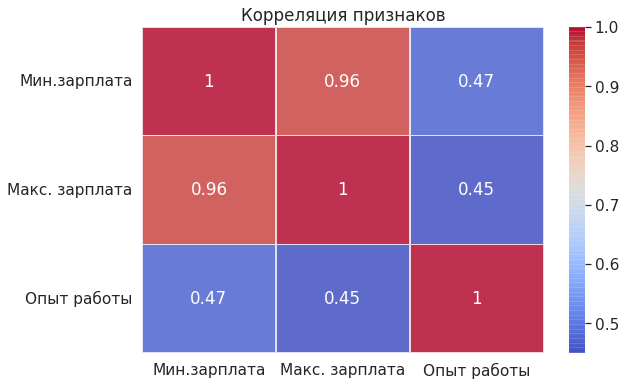

In [41]:
plt.figure(figsize=(9, 6))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm', alpha=0.8)
plt.title('Корреляция признаков')
plt.show()

Коэффициент корреляции 0.45 и 0.475 говорит о средней положительной взаимосвязи опыта работы с зарплатой.

#### Проверим еще одну гипотезу: Влияние ключевого навыка "Python" на зарплату аналитика
Отметим строки в которых встречается ключевой навык "Python".

In [42]:
key_maps = {0:'Нет навыка', 1: 'Python'}
dfa['python'] = dfa['key_skills_name'].apply(lambda x: 0 if pd.isna(x) else int(any('python' in k for k in x)))
dfa['python'] = dfa['python'].map(key_maps)

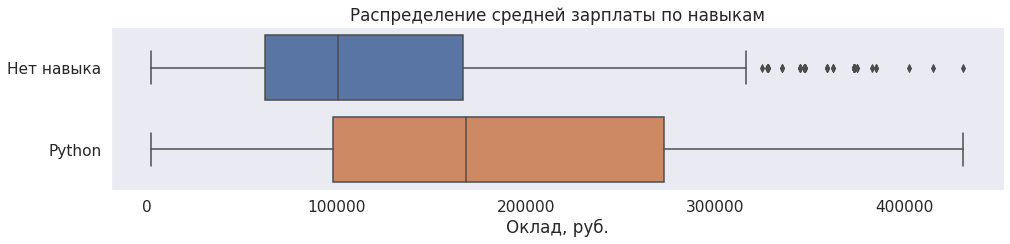

In [43]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.boxplot(x='salary_avg', y='python', data=dfa, ax=ax)
plt.title('Распределение средней зарплаты по навыкам')
plt.grid(axis='x')
plt.ylabel('')
plt.xlabel('Оклад, руб.')
plt.show()

Проверим влият ли наличие  ключевого навыка "Python" на среднюю зарплату с помощью критериея Манна — Уитни:

In [44]:
# задаем уровень значимости 5%
alpha = 0.05
results = stats.mannwhitneyu(*[dfa[dfa['python'] == kn]['salary_avg'].dropna() for kn in key_maps.values()])
check_result(results.pvalue)

p-value = 0.0000
Отвергаем нулевую гипотезу



По визуализации распределения зарплат видно, что наличие ключевого навыка "Python" влияет на зарплату Аналитика, также это подтвердил критерий Манна — Уитни: полученный p-value близок к нулю, т.е. мы отвергаем нулевую гипотезу об отсутствии влияния навыка на зарплату.

### 8. Постройте модель связи целевого показателя (при его наличии) в зависимости от факторов
- Выделите целевой показатель (если необходимо).
- Определите тип целевого показателя. В зависимости от этого в дальнейшем будет решаться задача регрессии, классификации или, если целевого показателя нет, задача кластеризации.
- Постройте модель связи целевого показателя в зависимости от факторов
- Попробуйте проинтерпретировать полученную модель


В датасете только один количественный признак "зарплата" - это будет целевой показатель. Но т.к. остальные признаки:
- один порядковый (experience-опыт работы)
- категориальные (employer-работодатель, area-регион, skills-ключевые навыкы, specializations-специализации)

Выполним ONE HOT ENCODING для этих признаков, но сначала оставим в датафрейме только записи, в которых присутствует "целевая переменная" salary_min.

In [45]:
dfp = dfp[~dfp.salary_min.isna()]
dfp

,name,name_part1,name_part2,salary_min,salary_max,region,area_id,area_name,employer_id,employer_name,experience_id,experience_name,key_skills_id,key_skills_name,specializations_id,specializations_name,salary_koeff,salary_avg,used
4,тестировщик.net,тестировщик.net,NaN,25000.0,50000.0,Астраханская область,15,Астрахань,1245158,МФК Саммит,between1And3,От 1 года до 3 лет,NaN,"(api, c#, git, sql, тестирование)","(1.117, 1.221, 1.82)","(инженер, программирование, разработка, тестир...",2.0,37500.0,False
5,smm-копирайтер,smm-копирайтер,NaN,51724.0,51724.0,Астраханская область,15,Астрахань,3106959,Комплекс-А,between3And6,От 3 до 6 лет,NaN,"(pr, анализ pr стратегии конкурентов, грамотна...","(3.236, 3.26, 3.318, 3.8, 3.90)","(pr, маркетинговые коммуникации, аналитик, инт...",1.0,51724.0,False
8,специалист по недвижимости,специалист по недвижимости,NaN,68966.0,103448.0,Астраханская область,15,Астрахань,5728722,НП Корпорация риэлторов Мегаполис-Сервис,noExperience,Нет опыта,NaN,"(активные продажи, ведение переговоров, вторич...","(12.376, 17.149, 17.183, 17.242, 20.20)","(агент, менеджер по работе с клиентами, началь...",NaN,86207.0,False
9,стажер/ученик риелтора,стажер/ученик риелтора,NaN,68966.0,103448.0,Астраханская область,15,Астрахань,6071831,Перспектива 24 (ИП Лукова Надежда Николаевна),noExperience,Нет опыта,NaN,"(жилая недвижимость, ип лукова надежда николае...","(12.376, 17.149, 17.183, 17.242, 20.20)","(агент, менеджер по работе с клиентами, началь...",NaN,86207.0,False
10,агент по недвижимости,агент по недвижимости,NaN,45000.0,67499.0,Астраханская область,15,Астрахань,2719828,Ярус,noExperience,Нет опыта,NaN,NaN,"(12.376, 17.149, 17.183, 17.242, 20.20)","(агент, менеджер по работе с клиентами, началь...",NaN,56249.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76375,ведущий менеджер по подбору персонала,ведущий менеджер по подбору персонала,NaN,51724.0,77585.0,Тульская область,92,Тула,152781,СофтИнжиниринг,between1And3,От 1 года до 3 лет,NaN,"(обучение персонала, организаторские навыки, о...","(6.184, 6.247, 6.254, 6.319)","(начальный уровень, мало опыта, развитие персо...",NaN,64654.5,False
76377,менеджер по подбору персонала,менеджер по подбору персонала,NaN,30000.0,45000.0,Тульская область,92,Тула,2499672,АПХ ЭКО-культура,between1And3,От 1 года до 3 лет,NaN,"(ms outlook, адаптация персонала, гибкость, ма...","(6.184, 6.247, 6.254, 6.319)","(начальный уровень, мало опыта, развитие персо...",NaN,37500.0,False
76378,специалист по подбору персонала,специалист по подбору персонала,NaN,45977.0,68965.0,Тульская область,1919,Донской,55841,ПРОМЕТ,between1And3,От 1 года до 3 лет,NaN,"(грамотная речь, обучение персонала, организац...","(6.184, 6.247, 6.254, 6.319)","(начальный уровень, мало опыта, развитие персо...",NaN,57471.0,False
76380,специалист по персоналу,специалист по персоналу,NaN,45977.0,68965.0,Тульская область,92,Тула,158937,Евраз Ванадий Тула,between3And6,От 3 до 6 лет,NaN,NaN,"(6.184, 6.247, 6.254, 6.319)","(начальный уровень, мало опыта, развитие персо...",NaN,57471.0,False


In [46]:
# кодирование опыта работы, удалим одну колоноку "moreThan6" для устранения мультиколлинеарности
dfm = pd.concat((dfp,pd.get_dummies(dfp.experience_id)), axis=1).drop('moreThan6', axis=1)

In [47]:
# для работодателя и региона используем колонки с идентификаторами
for col_name in ('employer_id', 'area_id'):
    dfp[col_name] = dfp[col_name].fillna(0)
    dfp[col_name] = dfp[col_name].astype(int)
    print(f'Признак: {col_name}, уникальных значений = {dfp[col_name].nunique()}')

Признак: employer_id, уникальных значений = 16195
Признак: area_id, уникальных значений = 1023


employer_id-работодатель очень много уникальных значений, не будем рассматривать этот признак, area_id тоже много значений, сгруппируем регионы с маленьким количеством вакансий в один, который будет включать 5% от общего объема вакансий.

In [48]:
def find_optimum(data, name_col, threshold=0.05):
    """
    Функция определения количества объектов для достижения 5% порога 
    от всех наблюдений в данных
    :param data: ДФ с данными
    :param name_col: колонка по которой будем считать порог
    :return: список значений признака, которые будем включать в выборку
    """
    temp = data[name_col].value_counts()
    limits = 0
    sm = 0
    while sm/len(dfp) < threshold:
        limits += 1
        sm = sum(temp[temp < limits])
    return temp[temp > limits].index

In [49]:
area_indexes = set(find_optimum(dfp, 'area_id', 0.01))

dfp.area_id = dfp.area_id.apply(lambda x: x if x in area_indexes else 0)

In [50]:
# кодирование региона, удалим одну колоноку: первую для устранения мультиколлинеарности
dfm = pd.concat((dfm, pd.get_dummies(dfp.area_id, drop_first=True, prefix='a')), axis=1)
dfm

,name,name_part1,name_part2,salary_min,salary_max,region,area_id,area_name,employer_id,employer_name,experience_id,experience_name,key_skills_id,key_skills_name,specializations_id,specializations_name,salary_koeff,salary_avg,used,0,between1And3,between3And6,noExperience,a_1,a_2,a_3,a_4,a_8,a_10,a_11,a_12,a_14,a_15,a_17,a_19,a_20,a_22,a_23,a_24,a_25,a_26,a_29,a_31,a_32,a_35,a_39,a_41,a_42,a_43,a_44,a_46,a_47,a_49,a_51,a_52,a_53,a_54,a_55,a_56,a_58,a_60,a_61,a_63,a_64,a_66,a_67,a_68,a_69,a_70,a_71,a_72,a_73,a_75,a_76,a_77,a_78,a_79,a_80,a_81,a_82,a_83,a_84,a_87,a_88,a_89,a_90,a_91,a_92,a_95,a_96,a_98,a_99,a_102,a_103,a_104,a_105,a_106,a_107,a_112,a_130,a_131,a_147,a_212,a_214,a_237,a_246,a_247,a_248,a_249,a_301,a_304,a_1014,a_1017,a_1025,a_1026,a_1040,a_1049,a_1050,a_1062,a_1067,a_1087,a_1091,a_1108,a_1126,a_1129,a_1130,a_1132,a_1135,a_1136,a_1137,a_1138,a_1140,a_1141,a_1142,a_1143,a_1144,a_1145,a_1148,a_1154,a_1159,a_1161,a_1162,a_1164,a_1179,a_1189,a_1204,a_1206,a_1209,a_1211,a_1219,a_1220,a_1225,a_1226,a_1231,a_1233,a_1236,a_1238,a_1240,a_1243,a_1258,a_1259,a_1262,a_1263,a_1265,a_1266,a_1269,a_1277,a_1278,a_1283,a_1285,a_1291,a_1295,a_1296,a_1297,a_1298,a_1299,a_1301,a_1302,a_1314,a_1319,a_1327,a_1335,a_1337,a_1340,a_1341,a_1344,a_1345,a_1350,a_1351,a_1355,a_1359,a_1360,a_1361,a_1362,a_1364,a_1365,a_1370,a_1373,a_1374,a_1375,a_1381,a_1390,a_1395,a_1396,a_1399,a_1400,a_1403,a_1409,a_1411,a_1412,a_1416,a_1418,a_1419,a_1420,a_1427,a_1429,a_1432,a_1437,a_1439,a_1440,a_1441,a_1442,a_1443,a_1444,a_1445,a_1447,a_1449,a_1450,a_1451,a_1452,a_1454,a_1456,a_1457,a_1458,a_1459,a_1460,a_1461,a_1462,a_1467,a_1485,a_1490,a_1492,a_1493,a_1494,a_1498,a_1512,a_1516,a_1531,a_1532,a_1533,a_1534,a_1535,a_1540,a_1545,a_1546,a_1550,a_1552,a_1561,a_1566,a_1571,a_1587,a_1588,a_1590,a_1594,a_1595,a_1599,a_1600,a_1613,a_1616,a_1621,a_1627,a_1631,a_1633,a_1635,a_1639,a_1641,a_1642,a_1647,a_1651,a_1654,a_1657,a_1663,a_1665,a_1682,a_1686,a_1691,a_1692,a_1709,a_1717,a_1720,a_1724,a_1728,a_1730,a_1753,a_1768,a_1811,a_1813,a_1814,a_1818,a_1820,a_1822,a_1825,a_1826,a_1827,a_1838,a_1854,a_1868,a_1882,a_1883,a_1893,a_1909,a_1914,a_1919,a_1924,a_1928,a_1930,a_1933,a_1937,a_1950,a_1951,a_1955,a_1958,a_1972,a_1973,a_1979,a_1986,a_1989,a_1990,a_1991,a_1993,a_1996,a_1997,a_1998,a_2001,a_2012,a_2014,a_2017,a_2018,a_2020,a_2022,a_2023,a_2025,a_2026,a_2028,a_2029,a_2032,a_2033,a_2034,a_2035,a_2036,a_2037,a_2038,a_2039,a_2040,a_2041,a_2042,a_2044,a_2045,a_2046,a_2048,a_2049,a_2050,a_2051,a_2052,a_2053,a_2056,a_2058,a_2059,a_2060,a_2061,a_2062,a_2063,a_2064,a_2065,a_2069,a_2070,a_2073,a_2074,a_2075,a_2076,a_2077,a_2078,a_2081,a_2082,a_2083,a_2084,a_2085,a_2086,a_2087,a_2088,a_2089,a_2090,a_2092,a_2093,a_2094,a_2095,a_2096,a_2097,a_2098,a_2100,a_2115,a_2116,a_2120,a_2230,a_2377,a_2381,a_2432,a_2441,a_2448,a_2490,a_2507,a_2522,a_2554,a_2634,a_2642,a_2657,a_2658,a_2689,a_2690,a_2708,a_2734,a_2750,a_2761,a_2805,a_2954,a_2961,a_3050,a_3271,a_3275,a_3288,a_3322,a_3433,a_3665,a_3697,a_3710,a_4023,a_4302,a_4624,a_4841,a_4865,a_5084,a_5960,a_5972,a_6059,a_6363,a_6458
4,тестировщик.net,тестировщик.net,NaN,25000.0,50000.0,Астраханская область,15,Астрахань,1245158,МФК Саммит,between1And3,От 1 года до 3 лет,NaN,"(api, c#, git, sql, тестирование)","(1.117, 1.221, 1.82)","(инженер, программирование, разработка, тестир...",2.0,37500.0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [51]:
# создадим ДФ из ID специализаций
sp = values_to_df(dfp, 'specializations', 'id')
print('Уникальных специализаций:', sp.specializations.nunique())

Уникальных специализаций: 396


Уникальных специализаций много, сгруппируем спициализации с маленьким количеством вакансий в одну, которая будет включать 5% от общего объема вакансий.

In [52]:
indexes = set(find_optimum(sp, 'specializations', 0.005))
# indexes = sp.specializations.unique()

dfp['sp_idx'] = dfp.specializations_id.apply(lambda x: '|'.join(f's_{i}'.replace('.', '_') 
                                                                for i in x if i in indexes) 
                                             if isinstance(x,(tuple, list, set)) else '')
len(indexes)

206

In [53]:
# кодирование специализации
dfm = pd.concat((dfm, dfp['sp_idx'].str.get_dummies(sep='|')), axis=1)
dfm

,name,name_part1,name_part2,salary_min,salary_max,region,area_id,area_name,employer_id,employer_name,experience_id,experience_name,key_skills_id,key_skills_name,specializations_id,specializations_name,salary_koeff,salary_avg,used,0,between1And3,between3And6,noExperience,a_1,a_2,a_3,a_4,a_8,a_10,a_11,a_12,a_14,a_15,a_17,a_19,a_20,a_22,a_23,a_24,a_25,a_26,a_29,a_31,a_32,a_35,a_39,a_41,a_42,a_43,a_44,a_46,a_47,a_49,a_51,a_52,a_53,a_54,a_55,a_56,a_58,a_60,a_61,a_63,a_64,a_66,a_67,a_68,a_69,a_70,a_71,a_72,a_73,a_75,a_76,a_77,a_78,a_79,a_80,a_81,a_82,a_83,a_84,a_87,a_88,a_89,a_90,a_91,a_92,a_95,a_96,a_98,a_99,a_102,a_103,a_104,a_105,a_106,a_107,a_112,a_130,a_131,a_147,a_212,a_214,a_237,a_246,a_247,a_248,a_249,a_301,a_304,a_1014,a_1017,a_1025,a_1026,a_1040,a_1049,a_1050,a_1062,a_1067,a_1087,a_1091,a_1108,a_1126,a_1129,a_1130,a_1132,a_1135,a_1136,a_1137,a_1138,a_1140,a_1141,a_1142,a_1143,a_1144,a_1145,a_1148,a_1154,a_1159,a_1161,a_1162,a_1164,a_1179,a_1189,a_1204,a_1206,a_1209,a_1211,a_1219,a_1220,a_1225,a_1226,a_1231,a_1233,a_1236,a_1238,a_1240,a_1243,a_1258,a_1259,a_1262,a_1263,a_1265,a_1266,a_1269,a_1277,a_1278,a_1283,a_1285,a_1291,a_1295,a_1296,a_1297,a_1298,a_1299,a_1301,a_1302,a_1314,a_1319,a_1327,a_1335,a_1337,a_1340,a_1341,a_1344,a_1345,a_1350,a_1351,a_1355,a_1359,a_1360,a_1361,a_1362,a_1364,a_1365,a_1370,a_1373,a_1374,a_1375,a_1381,a_1390,a_1395,a_1396,a_1399,a_1400,a_1403,a_1409,a_1411,a_1412,a_1416,a_1418,a_1419,a_1420,a_1427,a_1429,a_1432,a_1437,a_1439,a_1440,a_1441,a_1442,a_1443,a_1444,a_1445,a_1447,a_1449,a_1450,a_1451,a_1452,a_1454,a_1456,a_1457,a_1458,a_1459,a_1460,a_1461,a_1462,a_1467,a_1485,a_1490,a_1492,a_1493,a_1494,a_1498,a_1512,a_1516,a_1531,a_1532,a_1533,a_1534,a_1535,a_1540,a_1545,a_1546,a_1550,a_1552,a_1561,a_1566,a_1571,a_1587,a_1588,a_1590,a_1594,a_1595,a_1599,a_1600,a_1613,a_1616,a_1621,a_1627,a_1631,a_1633,a_1635,a_1639,a_1641,a_1642,a_1647,a_1651,a_1654,a_1657,a_1663,a_1665,a_1682,a_1686,a_1691,a_1692,a_1709,a_1717,a_1720,a_1724,a_1728,a_1730,a_1753,a_1768,a_1811,a_1813,a_1814,a_1818,a_1820,a_1822,a_1825,a_1826,a_1827,a_1838,a_1854,a_1868,a_1882,a_1883,a_1893,a_1909,a_1914,a_1919,a_1924,a_1928,a_1930,a_1933,a_1937,a_1950,a_1951,a_1955,a_1958,a_1972,a_1973,a_1979,a_1986,a_1989,a_1990,a_1991,a_1993,a_1996,a_1997,a_1998,a_2001,a_2012,a_2014,a_2017,a_2018,a_2020,a_2022,a_2023,a_2025,a_2026,a_2028,a_2029,a_2032,a_2033,a_2034,a_2035,a_2036,a_2037,a_2038,a_2039,a_2040,a_2041,a_2042,a_2044,a_2045,a_2046,a_2048,a_2049,a_2050,a_2051,a_2052,a_2053,a_2056,a_2058,a_2059,a_2060,a_2061,a_2062,a_2063,a_2064,a_2065,a_2069,a_2070,a_2073,a_2074,a_2075,a_2076,a_2077,a_2078,a_2081,a_2082,a_2083,a_2084,a_2085,a_2086,a_2087,a_2088,a_2089,a_2090,a_2092,a_2093,a_2094,a_2095,a_2096,a_2097,a_2098,a_2100,a_2115,a_2116,a_2120,a_2230,a_2377,a_2381,a_2432,a_2441,a_2448,a_2490,a_2507,a_2522,a_2554,a_2634,a_2642,a_2657,a_2658,a_2689,a_2690,a_2708,a_2734,a_2750,a_2761,a_2805,a_2954,a_2961,a_3050,a_3271,a_3275,a_3288,a_3322,a_3433,a_3665,a_3697,a_3710,a_4023,a_4302,a_4624,a_4841,a_4865,a_5084,a_5960,a_5972,a_6059,a_6363,a_6458,s_11_173,s_11_240,s_11_293,s_11_347,s_11_436,s_11_62,s_12_180,s_12_197,s_12_251,s_12_326,s_12_331,s_12_376,s_12_746,s_12_92,s_12_97,s_13_155,s_13_748,s_14_217,s_14_364,s_14_60,s_14_749,s_15_281,s_15_288,s_15_320,s_15_346,s_15_388,s_15_389,s_15_391,s_15_750,s_15_93,s_17_112,s_17_144,s_17_149,s_17_15,s_17_183,s_17_196,s_17_231,s_17_24,s_17_242,s_17_256,s_17_269,s_17_301,s_17_302,s_17_303,s_17_306,s_17_324,s_17_333,s_17_334,s_17_397,s_17_417,s_17_440,s_17_443,s_17_446,s_17_487,s_17_520,s_17_535,s_17_538,s_17_572,s_17_59,s_17_623,s_17_65,s_17_66,s_17_751,s_18_13,s_18_142,s_18_245,s_18_297,s_18_360,s_18_568,s_18_81,s_19_19,s_19_284,s_1_10,s_1_110,s_1_113,s_1_116,s_1_117,s_1_137,s_1_161,s_1_172,s_1_203,s_1_211,s_1_221,s_1_225,s_1_246,s_1_25,s_1_270,s_1_272,s_1_273,s_1_274,s_1_277,s_1_295,s_1_296,s_1_3,s_1_30,s_1_327,s_1_359,s_1_395,s_1_420,s_1_474,s_1_475,s_1_50,s_1_536,s_1_744,s_1_82,s_1_89,s_1_9,s_20_186,s_20_189,s_20_20

In [54]:
# создадим ДФ из ключевых навыков
df_ks = values_to_df(dfp, 'key_skills')
ks_vc = df_ks.key_skills.value_counts()
ks_vc 

работа в команде              6114
грамотная речь                5417
ведение переговоров           3619
активные продажи              3012
подбор персонала              3003
                              ... 
vclouddirector                   1
dell                             1
delta                            1
fujitsu                          1
базовые навыки web-дизайна       1
Name: key_skills, Length: 8256, dtype: int64

Слишком много уникальных значений, возможно нужно поработать с нормализацией навыков модулем nltk, пока возъмем первые 200 и будем с ними работать.

In [55]:
# Создание списка индексов ключевых навыков
keys_dict = {key:i for i, key in enumerate(ks_vc[:500].index, 1)}

def make_skills_id(skills):
    if isinstance(skills, (tuple, list, set)):
        keys = set(f'k_{keys_dict.get(key, 0)}' for key in skills)
#         keys.discard('k_0')
        return '|'.join(sorted(keys, key=lambda x: int(x.split('_')[-1])))
    return 'k_0'


dfp['key_skills_id'] = dfp.key_skills_name.map(make_skills_id)
dfp.loc[dfp.key_skills_id.isna(), 'key_skills_id'] = ''

In [56]:
dfp.head(7)

,name,name_part1,name_part2,salary_min,salary_max,region,area_id,area_name,employer_id,employer_name,experience_id,experience_name,key_skills_id,key_skills_name,specializations_id,specializations_name,salary_koeff,salary_avg,used,sp_idx
4,тестировщик.net,тестировщик.net,NaN,25000.0,50000.0,Астраханская область,15,Астрахань,1245158,МФК Саммит,between1And3,От 1 года до 3 лет,k_9|k_11|k_72|k_124|k_181,"(api, c#, git, sql, тестирование)","(1.117, 1.221, 1.82)","(инженер, программирование, разработка, тестир...",2.000000,37500.0,False,s_1_117|s_1_221|s_1_82
5,smm-копирайтер,smm-копирайтер,NaN,51724.0,51724.0,Астраханская область,15,Астрахань,3106959,Комплекс-А,between3And6,От 3 до 6 лет,k_0|k_2|k_8|k_43|k_169|k_251,"(pr, анализ pr стратегии конкурентов, грамотна...","(3.236, 3.26, 3.318, 3.8, 3.90)","(pr, маркетинговые коммуникации, аналитик, инт...",1.000000,51724.0,False,s_3_236|s_3_26|s_3_318|s_3_8|s_3_90
8,специалист по недвижимости,специалист по недвижимости,NaN,68966.0,103448.0,Астраханская область,15,Астрахань,5728722,НП Корпорация риэлторов Мегаполис-Сервис,noExperience,Нет опыта,k_3|k_4|k_28|k_29|k_36,"(активные продажи, ведение переговоров, вторич...","(12.376, 17.149, 17.183, 17.242, 20.20)","(агент, менеджер по работе с клиентами, началь...",NaN,86207.0,False,s_12_376|s_17_149|s_17_183|s_17_242|s_20_20
9,стажер/ученик риелтора,стажер/ученик риелтора,NaN,68966.0,103448.0,Астраханская область,15,Астрахань,6071831,Перспектива 24 (ИП Лукова Надежда Николаевна),noExperience,Нет опыта,k_0|k_7|k_15|k_53|k_109,"(жилая недвижимость, ип лукова надежда николае...","(12.376, 17.149, 17.183, 17.242, 20.20)","(агент, менеджер по работе с клиентами, началь...",NaN,86207.0,False,s_12_376|s_17_149|s_17_183|s_17_242|s_20_20
10,агент по недвижимости,агент по недвижимости,NaN,45000.0,67499.0,Астраханская область,15,Астрахань,2719828,Ярус,noExperience,Нет опыта,k_0,NaN,"(12.376, 17.149, 17.183, 17.242, 20.20)","(агент, менеджер по работе с клиентами, началь...",NaN,56249.5,False,s_12_376|s_17_149|s_17_183|s_17_242|s_20_20
11,риэлтор/специалист по недвижимости,риэлтор/специалист по недвижимости,NaN,68966.0,172414.0,Астраханская область,15,Астрахань,2759402,Бест Недвижимость,noExperience,Нет опыта,k_1|k_2|k_3|k_4|k_7|k_12|k_18|k_94|k_184|k_342,"(активные продажи, ведение переговоров, грамот...","(12.376, 17.149, 17.183, 17.242, 20.20)","(агент, менеджер по работе с клиентами, началь...",2.499986,120690.0,False,s_12_376|s_17_149|s_17_183|s_17_242|s_20_20
12,менеджер по поиску коммерческой недвижимости (...,менеджер по поиску коммерческой недвижимости,астраханская область,114943.0,172413.0,Астраханская область,15,Астрахань,2222250,Сеть аптек Апрель,between1And3,От 1 года до 3 лет,k_83|k_147|k_471,"(коммерческая недвижимость, оценка недвижимост...","(12.376, 17.149, 17.183, 17.242, 20.20)","(агент, менеджер по работе с клиентами, началь...",NaN,143678.0,False,s_12_376|s_17_149|s_17_183|s_17_242|s_20_20


In [57]:
# кодирование ключевых навыков
dfm = pd.concat((dfm, dfp['key_skills_id'].str.get_dummies(sep='|')), axis=1)
dfm

name  \
4                            тестировщик.net   
5                             smm-копирайтер   
8                 специалист по недвижимости   
9                     стажер/ученик риелтора   
10                     агент по недвижимости   
...                                      ...   
76375  ведущий менеджер по подбору персонала   
76377          менеджер по подбору персонала   
76378        специалист по подбору персонала   
76380                специалист по персоналу   
76381                    менеджер по подбору   

                                  name_part1 name_part2  salary_min  \
4                            тестировщик.net        NaN     25000.0   
5                             smm-копирайтер        NaN     51724.0   
8                 специалист по недвижимости        NaN     68966.0   
9                     стажер/ученик риелтора        NaN     68966.0   
10                     агент по недвижимости        NaN     45000.0   
...                                      ...        ...         ...   
76375  ведущий менеджер по подбору персонала        NaN     51724.0   
76377          менеджер по подбору персонала        NaN     30000.0   
76378        специалист по подбору персонала        NaN     45977.0   
76380                специалист по персоналу        NaN     45977.0   
76381                    менеджер по подбору        NaN     26867.0   

       salary_max                region area_id  area_name employer_id  \
4         50000.0  Астраханская область      15  Астрахань     1245158   
5         51724.0  Астраханская область      15  Астрахань     3106959   
8        103448.0  Астраханская область      15  Астрахань     5728722   
9        103448.0  Астраханская область      15  Астрахань     6071831   
10        67499.0  Астраханская область      15  Астрахань     2719828   
...           ...                   ...     ...        ...         ...   
76375     77585.0      Тульская область      92       Тула      152781   
76377     45000.0      Тульская область      92       Тула     2499672   
76378     68965.0      Тульская область    1919    Донской       55841   
76380     68965.0      Тульская область      92       Тула      158937   
76381     40300.0      Тульская область      92       Тула       49357   

                                       employer_name experience_id  \
4                                         МФК Саммит  between1And3   
5                                         Комплекс-А  between3And6   
8           НП Корпорация риэлторов Мегаполис-Сервис  noExperience   
9      Перспектива 24 (ИП Лукова Надежда Николаевна)  noExperience   
10                                              Ярус  noExperience   
...                                              ...           ...   
76375                                 СофтИнжиниринг  between1And3   
76377                               АПХ ЭКО-культура  between1And3   
76378                                         ПРОМЕТ  between1And3   
76380                             Евраз Ванадий Тула  between3And6   
76381                         МАГНИТ, Розничная сеть  between1And3   

          experience_name key_skills_id  \
4      От 1 года до 3 лет           NaN   
5           От 3 до 6 лет           NaN   
8               Нет опыта           NaN   
9               Нет опыта           NaN   
10              Нет опыта           NaN   
...                   ...           ...   
76375  От 1 года до 3 лет           NaN   
76377  От 1 года до 3 лет           NaN   
76378  От 1 года до 3 лет           NaN   
76380       От 3 до 6 лет           NaN   
76381  От 1 года до 3 лет           NaN   

                                         key_skills_name  \
4                      (api, c#, git, sql, тестирование)   
5      (pr, анализ pr стратегии конкурентов, грамотна...   
8      (активные продажи, ведение переговоров, вторич...   
9      (жилая недвижимость, ип лукова надежда николае...   
10                                                   NaN   
...

In [58]:
# удаление из данных исходных категориальных колонок и лишних с зарплатами
out_cols = ['name', 'name_part1', 'name_part2', 'salary_max', 'region', 
            'area_id', 'area_name', 'employer_id', 'employer_name', 
            'experience_id', 'experience_name', 'key_skills_id', 'key_skills_name',
            'specializations_id', 'specializations_name', 'salary_koeff', 
            'salary_avg', 'used', 'sp_idx', 0, '0']
dfl = dfm.drop([col for col in out_cols if col in dfm.columns], axis=1)
y = dfl.salary_min
X = dfl.drop('salary_min', axis=1)

#### Построение модели линейной регресии

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [60]:
LR = LinearRegression().fit(X,y)
LR.intercept_, LR.coef_

(37179.98506462821,
 array([-20944.01911648,   4706.70424799, -37330.15945773, ...,
         16888.25047697,  -2514.1173132 ,  -1440.53411665]))

In [61]:
r2_score(y, LR.predict(X))

0.4374074068998801

Метрика r2 получилась очень низкая.
#### Вывод: линейная регрессия не подходит для прогнозирования зарплаты для вакансий.
#### Для таких целей нужно использовать другие модели, например, дерево решений:

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
DT = DecisionTreeRegressor(random_state=2022).fit(X,y)
r2_score(y, DT.predict(X))

0.9426210424062077

#### На этих данных можно выполнить многоклассовую классификация по признаку experience_id - опыт работы

In [64]:
dfm.loc[dfm.experience_id == '0', 'experience_id'] = 'noExperience'
dfm.loc[dfm.experience_id == 0, 'experience_id'] = 'noExperience'
dfm.experience_id = dfm.experience_id.astype(str)
dfm.experience_id.value_counts()

between1And3    19878
noExperience    11556
between3And6     8515
moreThan6         842
Name: experience_id, dtype: int64

В наших данных наблюдается дисбаланс классов.

Выполним Label Encoding для целевой переменной experience_id

In [65]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

dfm['experience'] = LabelEncoder().fit_transform(dfm['experience_id'].astype(str))

In [66]:
# удаление из данных исходных категориальных колонок и лишних с зарплатами
out_cols = ['name', 'name_part1', 'name_part2', 'salary_max', 'region', 
            'area_id', 'area_name', 'employer_id', 'employer_name', 
            'experience_id', 'experience_name', 'key_skills_id', 'key_skills_name',
            'specializations_id', 'specializations_name', 'salary_koeff', 
            'salary_avg', 'used', 'sp_idx', 0, '0', 
            'between1And3', 'between3And6','noExperience', 'moreThan6']
dfl = dfm.drop([col for col in out_cols if col in dfm.columns], axis=1)
y = dfl.experience
X = dfl.drop('experience', axis=1)

In [67]:
# выполним нормализацию входных данных salary_min
X = StandardScaler().fit_transform(X)

In [68]:
LogR = LogisticRegression(class_weight='balanced', multi_class='multinomial', random_state=2022)
LogR.fit(X, y)
LogR.intercept_, LogR.coef_

(array([ 1.64793351,  0.64831539, -3.11629653,  0.82004762]),
 array([[-0.13778464, -0.25554559, -0.15230872, ...,  0.12356073,
          0.00434096, -0.02775857],
        [ 0.46229119,  0.06060079,  0.03545391, ...,  0.14670507,
          0.04621606, -0.10646126],
        [ 0.62061199,  0.77207335,  0.49504761, ..., -0.42274958,
         -0.0365726 ,  0.15144881],
        [-0.94511854, -0.57712855, -0.3781928 , ...,  0.15248378,
         -0.01398442, -0.01722899]]))

In [69]:
predict_y = LogR.predict(X)

#### Confusion matrix (Матрица неточностей)

In [70]:
pd.DataFrame(confusion_matrix(y, predict_y))

,0,1,2,3
0,10071,4327,2220,3260
1,1899,4325,1909,382
2,56,129,646,11
3,2066,418,280,8792


#### Метрики качества

In [71]:
print(classification_report(y, predict_y))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59     19878
           1       0.47      0.51      0.49      8515
           2       0.13      0.77      0.22       842
           3       0.71      0.76      0.73     11556

    accuracy                           0.58     40791
   macro avg       0.50      0.64      0.51     40791
weighted avg       0.65      0.58      0.60     40791



In [72]:
dfm.experience_id.value_counts()

between1And3    19878
noExperience    11556
between3And6     8515
moreThan6         842
Name: experience_id, dtype: int64

Точнее всего предсказывается класс "Без опыта работы", затем "От 1 года до 3 лет", далее "От 3 до 6 лет" и совсем плохо с классом "Более 6 лет".

Предсказательная способность классификатора по метрике f1-score с различными параметрами колеблется в диапазоне 51-60%. 

In [73]:
for param in ('micro', 'macro', 'weighted'):
    print(f"Метрика 'f1_score' с параметром '{param}' = {f1_score(y, predict_y, average=param)}")

Метрика 'f1_score' с параметром 'micro' = 0.5842955553921209
Метрика 'f1_score' с параметром 'macro' = 0.5082449663038027
Метрика 'f1_score' с параметром 'weighted' = 0.6029559965561376


In [74]:
dfm.experience_name.value_counts()

От 1 года до 3 лет    19878
Нет опыта             11145
От 3 до 6 лет          8515
Более 6 лет             842
0                       411
Name: experience_name, dtype: int64

Посмотрим на классификацию дерева решений

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=2022)
clf.fit(X, y)
clf_y = clf.predict(X)

In [77]:
pd.DataFrame(confusion_matrix(y, clf_y))

,0,1,2,3
0,19449,208,68,153
1,29,8435,44,7
2,0,0,842,0
3,41,17,8,11490


In [78]:
print(classification_report(y, clf_y))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19878
           1       0.97      0.99      0.98      8515
           2       0.88      1.00      0.93       842
           3       0.99      0.99      0.99     11556

    accuracy                           0.99     40791
   macro avg       0.96      0.99      0.97     40791
weighted avg       0.99      0.99      0.99     40791



#### И в задаче классификации дерево решений превзошло линейный классификатор